# Skeleton of Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [1]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
import scipy.stats
%pylab inline

import os


Populating the interactive namespace from numpy and matplotlib


# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [2]:
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/ss12513/PUIdata


In [3]:
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/ss12513/PUIdata


In [4]:
!curl -O https://s3.amazonaws.com/tripdata/201501-citibike-tripdata.zip
!curl -O https://s3.amazonaws.com/tripdata/201505-citibike-tripdata.zip
!unzip 201501-citibike-tripdata.zip
!unzip 201505-citibike-tripdata.zip 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6845k  100 6845k    0     0  21.4M      0 --:--:-- --:--:-- --:--:-- 21.4M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 28.9M  100 28.9M    0     0  57.1M      0 --:--:-- --:--:-- --:--:-- 57.1M
Archive:  201501-citibike-tripdata.zip
  inflating: 201501-citibike-tripdata.csv  
Archive:  201505-citibike-tripdata.zip
  inflating: 201505-citibike-tripdata.csv  


In [6]:
!mv 201501-citibike-tripdata.csv $PUIDATA 
!mv 201505-citibike-tripdata.csv $PUIDATA 

In [2]:
df=pd.read_csv(os.getenv("PUIDATA")+"/201501-citibike-tripdata.csv")
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [3]:
df2=pd.read_csv(os.getenv("PUIDATA")+"/201505-citibike-tripdata.csv")
df2.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,415,5/1/2015 00:00:11,5/1/2015 00:07:06,477,W 41 St & 8 Ave,40.756405,-73.990026,442,W 27 St & 7 Ave,40.746647,-73.993915,17012,Subscriber,1981.0,1
1,1523,5/1/2015 00:00:28,5/1/2015 00:25:52,293,Lafayette St & E 8 St,40.730287,-73.990765,324,DeKalb Ave & Hudson Ave,40.689888,-73.981013,17390,Customer,NaN,0
2,642,5/1/2015 00:00:52,5/1/2015 00:11:35,380,W 4 St & 7 Ave S,40.734011,-74.002939,507,E 25 St & 2 Ave,40.739126,-73.979738,15003,Subscriber,1990.0,1
3,367,5/1/2015 00:00:48,5/1/2015 00:06:55,537,Lexington Ave & E 24 St,40.740259,-73.984092,280,E 10 St & 5 Ave,40.733320,-73.995101,14788,Subscriber,1978.0,1
4,2734,5/1/2015 00:00:51,5/1/2015 00:46:26,426,West St & Chambers St,40.717548,-74.013221,327,Vesey Pl & River Terrace,40.715338,-74.016584,21068,Subscriber,1956.0,2


In [4]:
df.shape

(285552, 15)

In [5]:
df2.shape

(961986, 15)

In [5]:
frames = [df, df2]
df = pd.concat(frames)
df.index = range(len(df.index))
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [5]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

# SPLIT BY CATEGORY

as an example I am splitting data by gender and looking at age or riders:

**H0: There is no statistical difference in the trip duration distribution of riders who ride during the day and those who ride at night**
$$ \alpha = 0.05 $$

extracting the age happens in the cell below

In [ ]:
df['st-hour'] = pd.DatetimeIndex(df['starttime']).hour
df['stop-hour']= pd.DatetimeIndex(df['stoptime']).hour

In [7]:
df['dur_day']=df['tripduration'][(df['usertype'] == 'Subscriber') & (df['st-hour'] >= 5) & (df['st-hour'] <=18)&(df['stop-hour'] <= 18)]
df['dur_night']=df['tripduration'][(df['usertype'] == 'Subscriber') & (df['st-hour'] > 18) | (df['st-hour'] < 5)]

In [8]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
df.describe()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,st-hour,stop-hour,dur_day,dur_night
count,1.247538e+06,1.247538e+06,1.247538e+06,1.247538e+06,1.247538e+06,1.247538e+06,1.247538e+06,1.247538e+06,1.074358e+06,1.247538e+06,1.247538e+06,1.247538e+06,8.454470e+05,2.139440e+05
mean,9.210580e+02,4.430940e+02,4.073479e+01,-7.399087e+01,4.412755e+02,4.073455e+01,-7.399099e+01,1.811695e+04,1.975912e+03,1.051818e+00,1.391407e+01,1.407952e+01,7.536673e+02,7.884909e+02
std,6.013833e+03,3.247349e+02,1.946492e-02,1.225439e-02,3.228365e+02,1.943049e-02,1.227808e-02,2.065951e+03,1.150325e+01,5.721703e-01,4.812402e+00,4.857740e+00,4.820624e+03,5.993757e+03
min,6.000000e+01,7.200000e+01,4.064677e+01,-7.401713e+01,7.200000e+01,4.064677e+01,-7.401713e+01,1.452900e+04,1.885000e+03,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+01,6.000000e+01
25%,3.900000e+02,3.070000e+02,4.072182e+01,-7.399995e+01,3.060000e+02,4.072165e+01,-7.400004e+01,1.634600e+04,NaN,1.000000e+00,1.000000e+01,1.000000e+01,NaN,NaN
50%,6.250000e+02,4.120000e+02,4.073649e+01,-7.399076e+01,4.100000e+02,4.073625e+01,-7.399076e+01,1.811700e+04,NaN,1.000000e+00,1.500000e+01,1.500000e+01,NaN,NaN
75%,1.044000e+03,4.900000e+02,4.075020e+01,-7.398195e+01,4.900000e+02,4.075002e+01,-7.398195e+01,1.985300e+04,NaN,1.000000e+00,1.800000e+01,1.800000e+01,NaN,NaN
max,2.937702e+06,3.002000e+03,4.077152e+01,-7.395005e+01,3.002000e+03,4.077152e+01,-7.395005e+01,2.190700e+04,1.999000e+03,2.000000e+00,2.300000e+01,2.300000e+01,2.937702e+06,1.535944e+06


In [9]:
# dropping NaN values
df['dur_day'].dropna(inplace= True)
df['dur_night'].dropna(inplace= True)

lets split age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. 
the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

In [53]:
max(df())

1535944.0

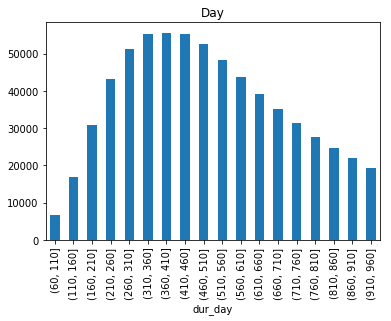

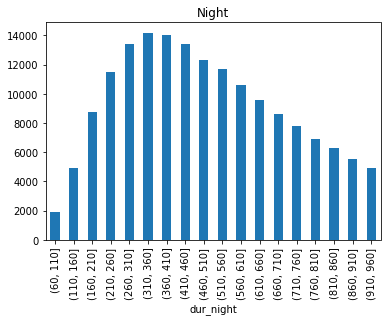

In [67]:
bins = np.arange(60,1000,50)
axD = df.dur_day.groupby(pd.cut(df.dur_day, bins)).agg([count_nonzero]).plot(kind='bar',
                                                               legend=False)
axD.set_title("Day")
axN = df.dur_night.groupby(pd.cut(df.dur_night, bins)).agg([count_nonzero]).plot(kind='bar',legend=False)
axN.set_title("Night");

Figure 1: histogrammed distribution of riders' trip duration by day and night.

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

            count_nonzero
dur_day                  
(60, 110]        0.001580
(110, 160]       0.005340
(160, 210]       0.011120
(210, 260]       0.014606
(260, 310]       0.017437
(310, 360]       0.018889
(360, 410]       0.019027
(410, 460]       0.015658
(460, 510]       0.009574
(510, 560]       0.006829
(560, 610]       0.003970
(610, 660]       0.002081
(660, 710]       0.000628
(710, 760]       0.000024
(760, 810]       0.000350
(810, 860]       0.000081
(860, 910]       0.000391
(910, 960]       0.000000


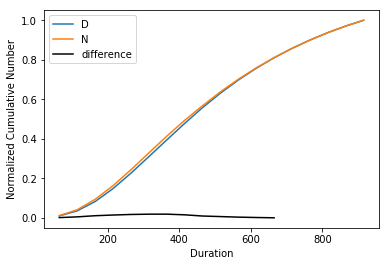

In [68]:
csD=df.dur_day.groupby(pd.cut(df.dur_day, bins)).agg([count_nonzero]).cumsum()

csN=df.dur_night.groupby(pd.cut(df.dur_night, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csD/ csD.max()-csN / csN.max()))

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "D")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "N")
pl.plot(bins[:-1] + 5, np.sqrt(csN / csN.max() - csD / csD.max())**2, 'k-',
        label = "difference")
pl.xlabel("Duration")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

** Figure 2: the cumulative distribution of CitiBike riders' duration by day and night** 

They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated. 

Notice that there may be NaN values you are gonna have to deal with! 
You can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

In [1]:

#remember that your imports should all be at the top. I leave it here to hightlight that this package is needed at this point of the workflow

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

In [12]:
ks = scipy.stats.ks_2samp(df['dur_day'],df['dur_night'] )
print (ks)

Ks_2sampResult(statistic=0.015667759553512586, pvalue=7.5000224099281819e-37)


**  FILL IN THE CELL BELOW!**

## your words here!...
## this cell is for you to tell me what the scipy KS test returned and what it means in terms of NULL HYPOTHESIS
## to do that refer to the scipy documentation to understand the output of the scipy.stats.ks_2samp function
scipy.stats.ks_2samp(data1, data2)-Computes the Kolmogorov-Smirnov statistic on 2 samples.This is a two-sided test for the null hypothesis that 2 independent samples are drawn from the same continuous distribution.

Input: 2 arrays which are the two samples drawn from continuous distribution.

Output: D which is the KS statistic
        p-value which is two tailed p-value.
        
Interpretation:If the P value is small,we can conclude that the two groups were sampled from populations with different distributions. The populations may differ in median, variability or the shape of the distribution.  

From the above test we can reject the null hypothesis since the p-value is very small (way) lesser than 5%. 

The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

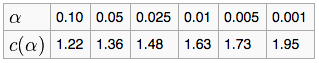

In [16]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
from IPython.display import Image
Image(filename="../plotsforclasses/ks2sample_table.png")

In [22]:
## your words here!...
## this cell is for you to redo the test with reducted dataset 
## and tell me what the scipy ks test returned and what it means in terms of NULL HYPOTHESIS
df2=df.sample(frac=0.02,random_state=1)
df2.shape

(24951, 19)

In [23]:
df2['dur_day'].dropna(inplace= True)
df2['dur_night'].dropna(inplace= True)
ks = scipy.stats.ks_2samp(df2['dur_day'],df2['dur_night'] )
print(ks)

Ks_2sampResult(statistic=0.019845763469298332, pvalue=0.13440089203488848)


Since the p-value is higher than  the chosen significance level we cannot reject the null hypothesis.

# Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



NULL HYPOTHEIS:
    **H0: There is no relationship between the trip duration distribution of riders who ride during the day and those who ride at night**
$$ \alpha = 0.05 $$

In [23]:
# your code here!
# wrangle the data as needed
# please perform the Pearson's test 
# and tell me what you ind in terms of NULL hypothesis
#df_10000 = df.dropna(subset=['dur_day','']).sample(10000)
#day_night_arr = np.array([df['dur_day'],df['dur_night']])
#durs=np.random.choice(day_night_arr,10000, replace=False)
np.random.seed(1)
durs1=np.random.choice(df['dur_day'],10000, replace=False)
durs2=np.random.choice(df['dur_night'],10000, replace=False)
durs1.sort()
durs2.sort()

scipy.stats.pearsonr(x, y) :Calculate a Pearson correlation coefficient and the p-value for testing non-correlation.
e other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

Input : array like two parameters

Output : It returns the correlation coefficient and p-value



In [24]:
p=scipy.stats.pearsonr(durs1,durs2)
print(p)

(0.95833352566053609, 0.0)


The p-value returned is less than 0.05 thus we can reject the null hypothesis.
It shows a positive correlation.

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

# Spearman's  test for correlation
NULL HYPOTHEIS:
    **H0: There is no relationship between the trip duration distribution of riders who ride during the day and those who ride at night**
$$ \alpha = 0.05 $$

Itcalculates a Spearman rank-order correlation coefficient and the p-value to test for non-correlation.

Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact monotonic relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

In [25]:
# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis

p=scipy.stats.spearmanr(durs1,durs2)
print(p)

SpearmanrResult(correlation=0.99999890204377084, pvalue=0.0)


The p-value returned is less than 0.05 thus we can reject the null hypothesis. It shows a positive correlation.

** please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??**

In [24]:
df_1=pd.read_csv(os.getenv("PUIDATA")+"/201501-citibike-tripdata.csv")
df_1=df_1.iloc[0:500]
df_1.shape

(500, 15)

In [25]:
df_2=pd.read_csv(os.getenv("PUIDATA")+"/201505-citibike-tripdata.csv")
df_2=df_2.iloc[0:500]
df_2.shape

(500, 15)

In [26]:
frames = [df_1, df_2]
df_1 = pd.concat(frames)
df_1.index = range(len(df_1.index))
df_1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [27]:
import shapefile
from shapely.geometry import Point # Point class
from shapely.geometry import shape # shape() is a function to convert geo objects through the interface

def point_to_boro(long,lat):    
   point = (long,lat) # an x,y tuple
   shp = shapefile.Reader('geo_export_3de25470-0f9f-4f33-98e8-34e09acda3ec.shp') #open the shapefile
   all_shapes = shp.shapes() # get all the polygons
   all_records = shp.records()
   
   boundary1 = all_shapes[0]
   boundary2 = all_shapes[3]
   if Point(point).within(shape(boundary1)):
      return all_records[0][1]   
   elif Point(point).within(shape(boundary2)):
      return all_records[3][1]
   else:
    return "Neither"

df_1['Boro'] = df_1.apply(lambda row: point_to_boro(row['start station longitude'],row['start station latitude']),axis=1)
df_1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Boro
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,Manhattan
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,Manhattan
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,Manhattan
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,Brooklyn
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,Manhattan


In [28]:
df_1['age']=2018-df_1['birth year']
df_1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Boro,age
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,Manhattan,58.0
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,Manhattan,55.0
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,Manhattan,44.0
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,Brooklyn,49.0
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,Manhattan,41.0


KS TEST


NULL HYPOTHESIS
**H0: There is no statistical difference in the age  distribution of riders whose trips originate in Manhattan and Brooklyn**
$$ \alpha = 0.05 $$

In [30]:
df_1['age_b']=df_1['age'][(df_1['Boro'] == 'Brooklyn')]
df_1['age_m']=df_1['age'][(df_1['Boro'] == 'Manhattan')]
df_1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Boro,age,age_b,age_m
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,Manhattan,58.0,NaN,58.0
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,Manhattan,55.0,NaN,55.0
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,Manhattan,44.0,NaN,44.0
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,Brooklyn,49.0,49.0,NaN
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,Manhattan,41.0,NaN,41.0


In [32]:
df_1['age_b'].dropna(inplace= True)
df_1['age_m'].dropna(inplace= True)
ks = scipy.stats.ks_2samp(df_1['age_b'],df_1['age_m'] )
print (ks)

Ks_2sampResult(statistic=0.05756539904097226, pvalue=0.91658701926869501)


From the above test we cannot reject the null hypothesis since the p-value is more than than 5%.

KS TEST for smaller sample

In [34]:
dfsmall=df_1.sample(frac=0.02,random_state=1)
dfsmall['age_b'].dropna(inplace= True)
dfsmall['age_m'].dropna(inplace= True)
ks = scipy.stats.ks_2samp(dfsmall['age_b'],dfsmall['age_m'] )
print (ks)

Ks_2sampResult(statistic=0.7230769230769232, pvalue=0.021862887168982589)


From the above test we can reject the null hypothesis since the p-value is smaller than than 5%

**Pearson's test for correlation**:

NULL HYPOTHEIS:

 **H0: There is no relationship between the age distribution of riders whose trip starts in Manhattan and those whose trip starts in Brooklyn**
$$ \alpha = 0.05 $$

In [71]:
np.random.seed(1)
age1=df_1['age_b']
age2=df_1['age_m']
age1 = age1[~np.isnan(age1)]
age2 = age2[~np.isnan(age2)]
age1=np.random.choice(age1,100, replace=False)
age2=np.random.choice(age2,100, replace=False)
age1.sort()
age2.sort()
p=scipy.stats.pearsonr(age1,age2)
print(p)

(0.97903822012068797, 1.5504804253172601e-69)


From the above test we can reject the null hypothesis since the p-value is smaller than than 5%

# Spearman's  test for correlation
NULL HYPOTHEIS:
    **H0: There is no relationship between the age distribution of riders whose trip starts in Brooklyn and those whose trip starts in Manhattan**
$$ \alpha = 0.05 $$

In [72]:
p=scipy.stats.spearmanr(age1,age2)
print(p)

SpearmanrResult(correlation=0.99807619883293797, pvalue=3.6297605888758814e-120)


From the above test we can reject the null hypothesis since the p-value is smaller than than 5%